# 4. Train ConvNN Model: Regression Method


In the following steps, you will: 

- Load the brown dwarf dataset used to train the ML models
- Prepare the X and y variables to deploy the trained ML models
- Visualize them for few cases

We will need the following modules from `TelescopeML`:

- *DeepBuilder*: to prepare the syntheric brown dwarf dataset, load the trained machine learning (ML) models
- *Predictor*: to prepare the observatinal brown dwarf dataset and deploy the trained ML models
- *StatVisAnalyzer*: provide statistical-test and plotting function  
- *IO_utils*: provide functions to load the trained ML models

In [1]:
from TelescopeML.DataMaster import *
from TelescopeML.DeepTrainer import *
from TelescopeML.Predictor import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
from TelescopeML.StatVisAnalyzer import *

No Bottleneck unit testing available.


Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## 3.1 Data Preperation 

### 3.1.1 Load the Synthetic spectra - training dataset

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 

Each spectrum has 104 features (or wavelengths in the astrophysics context, i.e., 0.897, 0.906, ..., 2.512~$\mu$m) and 4 parameters:
- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

In [2]:
# Read the `TelescopeML_reference_data` path

import os  # to check the path  

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__

'/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/'

 Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v2.csv.bz2'), compression='bz2')
train_BD.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


### 3.1.2 Check atmospheric parameters

- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!

In [4]:
target_features = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[target_features].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
# training_features_labels: they are Wavelengths variables in string format

training_features_labels = [item for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_labels[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
# training_features_wl: they are Wavelengths variables 

training_features_wl = [float(item) for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_wl[:5]

[2.512, 2.487, 2.462, 2.438, 2.413]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head(3)

,wl
0,2.511960
1,2.486966
2,2.462220


### 3.1.3 Prepare Inputs and outputs for ML models (X,y)
- X: 104 column variables or fluxes
- y: output variables: 'gravity', 'temperature',  'c_o_ratio', 'metallicity'

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!


In [8]:
# to assure we are only training the module with the native non-augmented BD training dataset
train_BD = train_BD[train_BD['is_augmented'].isin(['no'])] 


# Training feature variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity', 
             'is_augmented'])#.astype(np.float32)


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


log-transform the 'temperature' variable toreduce the skewness of the data, making it more symmetric and normal-like for the ML model


In [9]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [10]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


---

## 3.2 Build the CNN model and Processing the Data

Here we instintiate BuildRegressorCNN class from DeepBuilder module to prepare the datasets and take the trained CNN (Convolutional Neural Networks) for us:

- Take the synthetic datasets
- Process them, e.g.
    - Divide them to three sets: train, validation, and test sets
    - Scale y variables
    - Scale X variables
    - Create new features 
    

### 3.2.1 Instintiate BuildRegressorCNN class from DeepBuilder module

In [11]:
trained_Data_Processor = DataProcessor( 
                             feature_values=X.to_numpy(),
                             feature_names=X.columns,
                             target_values=y.to_numpy(),
                             target_name=['gravity', 'c_o_ratio', 'metallicity', 'temperature'],
                             is_tuned='yes',
                             param_grid=None,
                             spectral_resolution=100,
                             is_feature_improved='no',
                             is_augmented='no',
                             ml_model=None,
                             ml_model_str='CNN',
                                )

### 3.2.2 Split the dataset into train, validate and test sets

In [12]:
trained_Data_Processor.split_train_validation_test(test_size=0.1, 
                                                 val_size=0.1, 
                                                 random_state_=100,)

### 3.2.3 Standardize X Variables Row-wise 

In [13]:
# Scale the X features using MinMax Scaler
trained_Data_Processor.standardize_X_row_wise()

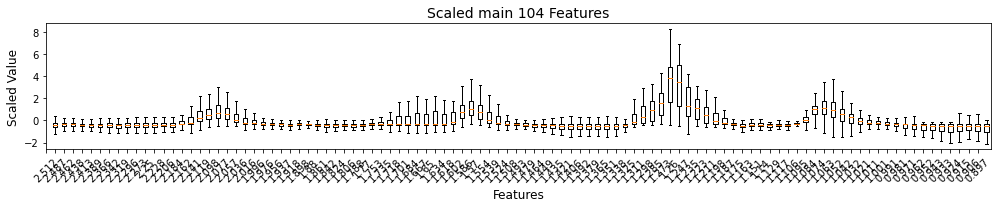

In [14]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_train_standardized_rowwise, 
                                                  xticks_list = training_features_labels,
                                                  title = 'Scaled main 104 Features',
                                                  fig_size=(14, 3),
                                                    )

### 3.2.4 Standardize y Variables Column-wise 

In [15]:
# Standardize the y features using Standard Scaler
trained_Data_Processor.standardize_y_column_wise()

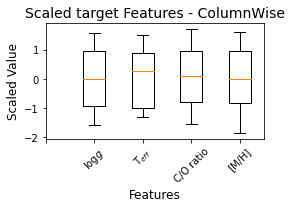

In [16]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.y_train_standardized_columnwise, 
                                                  xticks_list = ['','$\log g$', 'T$_{eff}$', 'C/O ratio', '[M/H]'],
                                                  title = 'Scaled target Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

### 3.2.5 Feature engeenering: Take Min and Max of each row (BD spectra) 

In [17]:
# train
trained_Data_Processor.X_train_min = trained_Data_Processor.X_train.min(axis=1)
trained_Data_Processor.X_train_max = trained_Data_Processor.X_train.max(axis=1)

# validation
trained_Data_Processor.X_val_min = trained_Data_Processor.X_val.min(axis=1)
trained_Data_Processor.X_val_max = trained_Data_Processor.X_val.max(axis=1)

# test
trained_Data_Processor.X_test_min = trained_Data_Processor.X_test.min(axis=1)
trained_Data_Processor.X_test_max = trained_Data_Processor.X_test.max(axis=1)

In [18]:
df_MinMax_train = pd.DataFrame((trained_Data_Processor.X_train_min, trained_Data_Processor.X_train_max)).T
df_MinMax_val = pd.DataFrame((trained_Data_Processor.X_val_min, trained_Data_Processor.X_val_max)).T
df_MinMax_test = pd.DataFrame((trained_Data_Processor.X_test_min, trained_Data_Processor.X_test_max)).T

In [19]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)

In [20]:
df_MinMax_train.head()

,min,max
0,2.984493e-18,4.560593e-11
1,6.833671e-15,2.317328e-09
2,2.870361e-14,5.564836e-09
3,5.696652e-19,5.071436e-11
4,1.321553e-10,1.636513e-07


### 3.2.6 Scale Min Max features - ColumnWise

In [21]:
trained_Data_Processor.standardize_X_column_wise(
                                                X_train = df_MinMax_train.to_numpy(),
                                                X_val   = df_MinMax_val.to_numpy(),
                                                X_test  = df_MinMax_test.to_numpy(),
                                                )

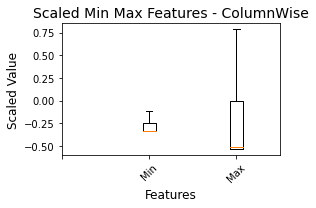

In [22]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_test_standardized_columnwise, 
                                                  xticks_list = ['','Min','Max'],
                                                  title = 'Scaled Min Max Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

## 3.3 Train CNN model

### 3.3.1 Instintiate *TrainRegressorCNN* class from *DeepTrainer* Module

In [23]:
train_cnn_model = TrainRegressorCNN(
            # input dataset: StandardScaled instances  
            X1_train = trained_Data_Processor.X_train_standardized_rowwise,
            X1_val   = trained_Data_Processor.X_val_standardized_rowwise,
            X1_test  = trained_Data_Processor.X_test_standardized_rowwise,

            # input dataset: Min Max of each instance  
            X2_train = trained_Data_Processor.X_train_standardized_columnwise,
            X2_val   = trained_Data_Processor.X_val_standardized_columnwise,
            X2_test  = trained_Data_Processor.X_test_standardized_columnwise,
#             X2_train = trained_Data_Processor.X_train_normalized_columnwise,
#             X2_val   = trained_Data_Processor.X_val_normalized_columnwise,
#             X2_test  = trained_Data_Processor.X_test_normalized_columnwise,

            # 1st target
            y1_train = trained_Data_Processor.y_train_standardized_columnwise[:,0],
            y1_val   = trained_Data_Processor.y_val_standardized_columnwise[:,0],
            y1_test  = trained_Data_Processor.y_test_standardized_columnwise[:,0],

            # 2nd target
            y2_train = trained_Data_Processor.y_train_standardized_columnwise[:,1],
            y2_val   = trained_Data_Processor.y_val_standardized_columnwise[:,1],
            y2_test  = trained_Data_Processor.y_test_standardized_columnwise[:,1],

            # 3rd target
            y3_train = trained_Data_Processor.y_train_standardized_columnwise[:,2],
            y3_val   = trained_Data_Processor.y_val_standardized_columnwise[:,2],
            y3_test  = trained_Data_Processor.y_test_standardized_columnwise[:,2],

            # 4th target
            y4_train = trained_Data_Processor.y_train_standardized_columnwise[:,3],
            y4_val   = trained_Data_Processor.y_val_standardized_columnwise[:,3],
            y4_test  = trained_Data_Processor.y_test_standardized_columnwise[:,3],
            )

### 3.3.2 Define the Hyperparameters

In [24]:
hyperparameters = {'Conv__MaxPooling1D': 2,
                 'Conv__num_blocks': 1,
                 'Conv__num_layers_per_block': 3,
                 'Conv__num_filters': 4,
                 'Conv__kernel_size': 6,
                   
                 'FC2__num_blocks': 4,
                 'FC2_num_layers_per_block': 2,
                 'FC__dropout': 0.0024609140719442646,
                 'FC2__dropout': 64,
                 'FC2__units': 64,
#                  'FC__units_gravity': 16,
#                  'FC__units_metallicity': 256,
#                  'FC__units_temperature': 8,
                   
                 'FC1__num_blocks': 1,
                 'FC1_num_layers_per_block': 4,
                 'FC2__dropout': 0.09889223768186726,
                 'FC1__units': 128,
                 'FC1__dropout': 0.002185843015008406,
                   
                 'learning_rate': 4.9946842008422193e-05}

In [25]:
# hyperparameters = {
#      'Conv__MaxPooling1D': 2,
#      'Conv__num_blocks': 1,
#      'Conv__num_layers_per_block': 3,
#      'Conv__num_filters': 4,
#      'Conv__kernel_size': 6,
#      'FC__NumberLayers': 4,
    
#      'FC1__num_blocks' : 1,
#      'FC1_num_layers_per_block': 2,
#      'FC1__dropout': 0.09889223768186726,
#      'FC1__units': 128,

#      'FC2__num_blocks' : 1,
#      'FC2_num_layers_per_block':2,
#      'FC2__dropout': 0.0024609140719442646,
#      'FC2__units': 64,

    
#      'learning_rate': 4.9946842008422193e-05}

### 3.3.3 Build a CNN model

In [26]:
train_cnn_model.build_model(hyperparameters = hyperparameters, 
                     )

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


None


### 3.3.4 Train the CNN model using the datasets

In [27]:
history, model =  train_cnn_model.fit_cnn_model(batch_size=2**11,
                                                budget=4)

Epoch 1/4


 1/13 [=>............................] - ETA: 1:23 - loss: 1.8398 - gravity_loss: 0.4566 - c_o_ratio_loss: 0.4745 - metallicity_loss: 0.4583 - temperature_loss: 0.4504 - gravity_mae: 0.8551 - c_o_ratio_mae: 0.8967 - metallicity_mae: 0.8549 - temperature_mae: 0.8519

 2/13 [===>..........................] - ETA: 39s - loss: 1.8359 - gravity_loss: 0.4640 - c_o_ratio_loss: 0.4643 - metallicity_loss: 0.4622 - temperature_loss: 0.4455 - gravity_mae: 0.8651 - c_o_ratio_mae: 0.8839 - metallicity_mae: 0.8603 - temperature_mae: 0.8470 

 3/13 [=====>........................] - ETA: 35s - loss: 1.8160 - gravity_loss: 0.4671 - c_o_ratio_loss: 0.4620 - metallicity_loss: 0.4546 - temperature_loss: 0.4323 - gravity_mae: 0.8696 - c_o_ratio_mae: 0.8817 - metallicity_mae: 0.8513 - temperature_mae: 0.8304

 4/13 [========>.....................] - ETA: 33s - loss: 1.7771 - gravity_loss: 0.4632 - c_o_ratio_loss: 0.4617 - metallicity_loss: 0.4487 - temperature_loss: 0.4035 - gravity_mae: 0.8647 - c_o_ratio_mae: 0.8800 - metallicity_mae: 0.8437 - temperature_mae: 0.7948

 5/13 [==========>...................] - ETA: 29s - loss: 1.7242 - gravity_loss: 0.4642 - c_o_ratio_loss: 0.4621 - metallicity_loss: 0.4395 - temperature_loss: 0.3584 - gravity_mae: 0.8660 - c_o_ratio_mae: 0.8798 - metallicity_mae: 0.8333 - temperature_mae: 0.7304

 6/13 [============>.................] - ETA: 26s - loss: 1.6641 - gravity_loss: 0.4596 - c_o_ratio_loss: 0.4597 - metallicity_loss: 0.4277 - temperature_loss: 0.3171 - gravity_mae: 0.8608 - c_o_ratio_mae: 0.8759 - metallicity_mae: 0.8198 - temperature_mae: 0.6704

 7/13 [===============>..............] - ETA: 22s - loss: 1.6433 - gravity_loss: 0.4560 - c_o_ratio_loss: 0.4588 - metallicity_loss: 0.4133 - temperature_loss: 0.3152 - gravity_mae: 0.8568 - c_o_ratio_mae: 0.8742 - metallicity_mae: 0.8013 - temperature_mae: 0.6741

 8/13 [=================>............] - ETA: 18s - loss: 1.6115 - gravity_loss: 0.4532 - c_o_ratio_loss: 0.4575 - metallicity_loss: 0.4005 - temperature_loss: 0.3004 - gravity_mae: 0.8541 - c_o_ratio_mae: 0.8723 - metallicity_mae: 0.7851 - temperature_mae: 0.6541

 9/13 [===================>..........] - ETA: 14s - loss: 1.5667 - gravity_loss: 0.4489 - c_o_ratio_loss: 0.4543 - metallicity_loss: 0.3862 - temperature_loss: 0.2773 - gravity_mae: 0.8492 - c_o_ratio_mae: 0.8680 - metallicity_mae: 0.7670 - temperature_mae: 0.6209

10/13 [======================>.......] - ETA: 11s - loss: 1.5243 - gravity_loss: 0.4453 - c_o_ratio_loss: 0.4529 - metallicity_loss: 0.3708 - temperature_loss: 0.2553 - gravity_mae: 0.8450 - c_o_ratio_mae: 0.8662 - metallicity_mae: 0.7474 - temperature_mae: 0.5851

11/13 [========================>.....] - ETA: 7s - loss: 1.4954 - gravity_loss: 0.4420 - c_o_ratio_loss: 0.4506 - metallicity_loss: 0.3570 - temperature_loss: 0.2457 - gravity_mae: 0.8411 - c_o_ratio_mae: 0.8637 - metallicity_mae: 0.7289 - temperature_mae: 0.5728 

12/13 [==========================>...] - ETA: 3s - loss: 1.4662 - gravity_loss: 0.4368 - c_o_ratio_loss: 0.4487 - metallicity_loss: 0.3453 - temperature_loss: 0.2354 - gravity_mae: 0.8346 - c_o_ratio_mae: 0.8615 - metallicity_mae: 0.7132 - temperature_mae: 0.5575

13/13 [==============================] - ETA: 0s - loss: 1.4590 - gravity_loss: 0.4354 - c_o_ratio_loss: 0.4477 - metallicity_loss: 0.3436 - temperature_loss: 0.2323 - gravity_mae: 0.8328 - c_o_ratio_mae: 0.8601 - metallicity_mae: 0.7110 - temperature_mae: 0.5527

13/13 [==============================] - 51s 4s/step - loss: 1.4590 - gravity_loss: 0.4354 - c_o_ratio_loss: 0.4477 - metallicity_loss: 0.3436 - temperature_loss: 0.2323 - gravity_mae: 0.8328 - c_o_ratio_mae: 0.8601 - metallicity_mae: 0.7110 - temperature_mae: 0.5527 - val_loss: 1.0829 - val_gravity_loss: 0.3761 - val_c_o_ratio_loss: 0.4006 - val_metallicity_loss: 0.2399 - val_temperature_loss: 0.0663 - val_gravity_mae: 0.7579 - val_c_o_ratio_mae: 0.7978 - val_metallicity_mae: 0.5731 - val_temperature_mae: 0.3017


Epoch 2/4


 1/13 [=>............................] - ETA: 44s - loss: 1.1066 - gravity_loss: 0.3856 - c_o_ratio_loss: 0.4183 - metallicity_loss: 0.2270 - temperature_loss: 0.0758 - gravity_mae: 0.7685 - c_o_ratio_mae: 0.8209 - metallicity_mae: 0.5547 - temperature_mae: 0.3254

 2/13 [===>..........................] - ETA: 40s - loss: 1.0899 - gravity_loss: 0.3851 - c_o_ratio_loss: 0.4087 - metallicity_loss: 0.2196 - temperature_loss: 0.0766 - gravity_mae: 0.7687 - c_o_ratio_mae: 0.8089 - metallicity_mae: 0.5446 - temperature_mae: 0.3268

 3/13 [=====>........................] - ETA: 37s - loss: 1.0610 - gravity_loss: 0.3804 - c_o_ratio_loss: 0.3973 - metallicity_loss: 0.2147 - temperature_loss: 0.0687 - gravity_mae: 0.7622 - c_o_ratio_mae: 0.7943 - metallicity_mae: 0.5364 - temperature_mae: 0.3042

 4/13 [========>.....................] - ETA: 34s - loss: 1.0366 - gravity_loss: 0.3762 - c_o_ratio_loss: 0.3911 - metallicity_loss: 0.2102 - temperature_loss: 0.0591 - gravity_mae: 0.7587 - c_o_ratio_mae: 0.7877 - metallicity_mae: 0.5303 - temperature_mae: 0.2749

 5/13 [==========>...................] - ETA: 30s - loss: 1.0183 - gravity_loss: 0.3719 - c_o_ratio_loss: 0.3835 - metallicity_loss: 0.2063 - temperature_loss: 0.0566 - gravity_mae: 0.7535 - c_o_ratio_mae: 0.7789 - metallicity_mae: 0.5261 - temperature_mae: 0.2705

 6/13 [============>.................] - ETA: 27s - loss: 1.0012 - gravity_loss: 0.3701 - c_o_ratio_loss: 0.3718 - metallicity_loss: 0.2035 - temperature_loss: 0.0558 - gravity_mae: 0.7504 - c_o_ratio_mae: 0.7630 - metallicity_mae: 0.5231 - temperature_mae: 0.2708

 7/13 [===============>..............] - ETA: 23s - loss: 0.9860 - gravity_loss: 0.3682 - c_o_ratio_loss: 0.3619 - metallicity_loss: 0.2029 - temperature_loss: 0.0530 - gravity_mae: 0.7468 - c_o_ratio_mae: 0.7491 - metallicity_mae: 0.5220 - temperature_mae: 0.2635

 8/13 [=================>............] - ETA: 19s - loss: 0.9705 - gravity_loss: 0.3651 - c_o_ratio_loss: 0.3518 - metallicity_loss: 0.2026 - temperature_loss: 0.0510 - gravity_mae: 0.7420 - c_o_ratio_mae: 0.7338 - metallicity_mae: 0.5220 - temperature_mae: 0.2575

 9/13 [===================>..........] - ETA: 16s - loss: 0.9597 - gravity_loss: 0.3628 - c_o_ratio_loss: 0.3427 - metallicity_loss: 0.2038 - temperature_loss: 0.0505 - gravity_mae: 0.7384 - c_o_ratio_mae: 0.7200 - metallicity_mae: 0.5236 - temperature_mae: 0.2566

10/13 [======================>.......] - ETA: 12s - loss: 0.9477 - gravity_loss: 0.3601 - c_o_ratio_loss: 0.3357 - metallicity_loss: 0.2034 - temperature_loss: 0.0485 - gravity_mae: 0.7344 - c_o_ratio_mae: 0.7098 - metallicity_mae: 0.5225 - temperature_mae: 0.2515

11/13 [========================>.....] - ETA: 8s - loss: 0.9344 - gravity_loss: 0.3566 - c_o_ratio_loss: 0.3287 - metallicity_loss: 0.2027 - temperature_loss: 0.0465 - gravity_mae: 0.7296 - c_o_ratio_mae: 0.7000 - metallicity_mae: 0.5216 - temperature_mae: 0.2450 

12/13 [==========================>...] - ETA: 4s - loss: 0.9224 - gravity_loss: 0.3542 - c_o_ratio_loss: 0.3212 - metallicity_loss: 0.2015 - temperature_loss: 0.0455 - gravity_mae: 0.7259 - c_o_ratio_mae: 0.6897 - metallicity_mae: 0.5205 - temperature_mae: 0.2418

13/13 [==============================] - ETA: 0s - loss: 0.9201 - gravity_loss: 0.3540 - c_o_ratio_loss: 0.3199 - metallicity_loss: 0.2009 - temperature_loss: 0.0453 - gravity_mae: 0.7257 - c_o_ratio_mae: 0.6878 - metallicity_mae: 0.5197 - temperature_mae: 0.2411

13/13 [==============================] - 51s 4s/step - loss: 0.9201 - gravity_loss: 0.3540 - c_o_ratio_loss: 0.3199 - metallicity_loss: 0.2009 - temperature_loss: 0.0453 - gravity_mae: 0.7257 - c_o_ratio_mae: 0.6878 - metallicity_mae: 0.5197 - temperature_mae: 0.2411 - val_loss: 0.7197 - val_gravity_loss: 0.3137 - val_c_o_ratio_loss: 0.2101 - val_metallicity_loss: 0.1755 - val_temperature_loss: 0.0204 - val_gravity_mae: 0.6687 - val_c_o_ratio_mae: 0.5210 - val_metallicity_mae: 0.4804 - val_temperature_mae: 0.1589


Epoch 3/4


 1/13 [=>............................] - ETA: 45s - loss: 0.7408 - gravity_loss: 0.3176 - c_o_ratio_loss: 0.2107 - metallicity_loss: 0.1814 - temperature_loss: 0.0311 - gravity_mae: 0.6724 - c_o_ratio_mae: 0.5301 - metallicity_mae: 0.4891 - temperature_mae: 0.1962

 2/13 [===>..........................] - ETA: 42s - loss: 0.7407 - gravity_loss: 0.3218 - c_o_ratio_loss: 0.2142 - metallicity_loss: 0.1774 - temperature_loss: 0.0272 - gravity_mae: 0.6781 - c_o_ratio_mae: 0.5302 - metallicity_mae: 0.4844 - temperature_mae: 0.1839

 3/13 [=====>........................] - ETA: 39s - loss: 0.7369 - gravity_loss: 0.3214 - c_o_ratio_loss: 0.2133 - metallicity_loss: 0.1775 - temperature_loss: 0.0246 - gravity_mae: 0.6774 - c_o_ratio_mae: 0.5312 - metallicity_mae: 0.4839 - temperature_mae: 0.1749

 4/13 [========>.....................] - ETA: 36s - loss: 0.7321 - gravity_loss: 0.3235 - c_o_ratio_loss: 0.2105 - metallicity_loss: 0.1755 - temperature_loss: 0.0226 - gravity_mae: 0.6817 - c_o_ratio_mae: 0.5280 - metallicity_mae: 0.4818 - temperature_mae: 0.1669

 5/13 [==========>...................] - ETA: 32s - loss: 0.7169 - gravity_loss: 0.3205 - c_o_ratio_loss: 0.2010 - metallicity_loss: 0.1734 - temperature_loss: 0.0221 - gravity_mae: 0.6774 - c_o_ratio_mae: 0.5151 - metallicity_mae: 0.4792 - temperature_mae: 0.1643

 6/13 [============>.................] - ETA: 28s - loss: 0.7082 - gravity_loss: 0.3175 - c_o_ratio_loss: 0.1958 - metallicity_loss: 0.1731 - temperature_loss: 0.0217 - gravity_mae: 0.6742 - c_o_ratio_mae: 0.5076 - metallicity_mae: 0.4788 - temperature_mae: 0.1627

 7/13 [===============>..............] - ETA: 24s - loss: 0.7014 - gravity_loss: 0.3170 - c_o_ratio_loss: 0.1915 - metallicity_loss: 0.1720 - temperature_loss: 0.0210 - gravity_mae: 0.6737 - c_o_ratio_mae: 0.4990 - metallicity_mae: 0.4772 - temperature_mae: 0.1604

 8/13 [=================>............] - ETA: 20s - loss: 0.6948 - gravity_loss: 0.3156 - c_o_ratio_loss: 0.1863 - metallicity_loss: 0.1723 - temperature_loss: 0.0205 - gravity_mae: 0.6723 - c_o_ratio_mae: 0.4909 - metallicity_mae: 0.4777 - temperature_mae: 0.1586

 9/13 [===================>..........] - ETA: 16s - loss: 0.6882 - gravity_loss: 0.3159 - c_o_ratio_loss: 0.1812 - metallicity_loss: 0.1714 - temperature_loss: 0.0199 - gravity_mae: 0.6730 - c_o_ratio_mae: 0.4826 - metallicity_mae: 0.4766 - temperature_mae: 0.1555

10/13 [======================>.......] - ETA: 12s - loss: 0.6843 - gravity_loss: 0.3161 - c_o_ratio_loss: 0.1766 - metallicity_loss: 0.1720 - temperature_loss: 0.0196 - gravity_mae: 0.6737 - c_o_ratio_mae: 0.4759 - metallicity_mae: 0.4777 - temperature_mae: 0.1544

11/13 [========================>.....] - ETA: 8s - loss: 0.6778 - gravity_loss: 0.3154 - c_o_ratio_loss: 0.1718 - metallicity_loss: 0.1711 - temperature_loss: 0.0195 - gravity_mae: 0.6733 - c_o_ratio_mae: 0.4686 - metallicity_mae: 0.4760 - temperature_mae: 0.1539 

12/13 [==========================>...] - ETA: 4s - loss: 0.6731 - gravity_loss: 0.3152 - c_o_ratio_loss: 0.1675 - metallicity_loss: 0.1712 - temperature_loss: 0.0192 - gravity_mae: 0.6730 - c_o_ratio_mae: 0.4609 - metallicity_mae: 0.4761 - temperature_mae: 0.1530

13/13 [==============================] - ETA: 0s - loss: 0.6715 - gravity_loss: 0.3149 - c_o_ratio_loss: 0.1666 - metallicity_loss: 0.1708 - temperature_loss: 0.0192 - gravity_mae: 0.6725 - c_o_ratio_mae: 0.4595 - metallicity_mae: 0.4754 - temperature_mae: 0.1528

13/13 [==============================] - 55s 4s/step - loss: 0.6715 - gravity_loss: 0.3149 - c_o_ratio_loss: 0.1666 - metallicity_loss: 0.1708 - temperature_loss: 0.0192 - gravity_mae: 0.6725 - c_o_ratio_mae: 0.4595 - metallicity_mae: 0.4754 - temperature_mae: 0.1528 - val_loss: 0.6130 - val_gravity_loss: 0.2868 - val_c_o_ratio_loss: 0.1538 - val_metallicity_loss: 0.1586 - val_temperature_loss: 0.0137 - val_gravity_mae: 0.6316 - val_c_o_ratio_mae: 0.4365 - val_metallicity_mae: 0.4566 - val_temperature_mae: 0.1300


Epoch 4/4


 1/13 [=>............................] - ETA: 56s - loss: 0.6320 - gravity_loss: 0.3072 - c_o_ratio_loss: 0.1507 - metallicity_loss: 0.1586 - temperature_loss: 0.0155 - gravity_mae: 0.6565 - c_o_ratio_mae: 0.4224 - metallicity_mae: 0.4572 - temperature_mae: 0.1369

 2/13 [===>..........................] - ETA: 48s - loss: 0.6120 - gravity_loss: 0.3008 - c_o_ratio_loss: 0.1348 - metallicity_loss: 0.1614 - temperature_loss: 0.0150 - gravity_mae: 0.6476 - c_o_ratio_mae: 0.4053 - metallicity_mae: 0.4616 - temperature_mae: 0.1361

 3/13 [=====>........................] - ETA: 46s - loss: 0.5987 - gravity_loss: 0.2999 - c_o_ratio_loss: 0.1242 - metallicity_loss: 0.1594 - temperature_loss: 0.0151 - gravity_mae: 0.6456 - c_o_ratio_mae: 0.3861 - metallicity_mae: 0.4593 - temperature_mae: 0.1361

 4/13 [========>.....................] - ETA: 41s - loss: 0.5913 - gravity_loss: 0.2984 - c_o_ratio_loss: 0.1200 - metallicity_loss: 0.1577 - temperature_loss: 0.0151 - gravity_mae: 0.6449 - c_o_ratio_mae: 0.3789 - metallicity_mae: 0.4556 - temperature_mae: 0.1357

 5/13 [==========>...................] - ETA: 36s - loss: 0.5883 - gravity_loss: 0.2983 - c_o_ratio_loss: 0.1181 - metallicity_loss: 0.1572 - temperature_loss: 0.0148 - gravity_mae: 0.6469 - c_o_ratio_mae: 0.3779 - metallicity_mae: 0.4543 - temperature_mae: 0.1338

 6/13 [============>.................] - ETA: 31s - loss: 0.5823 - gravity_loss: 0.2974 - c_o_ratio_loss: 0.1144 - metallicity_loss: 0.1560 - temperature_loss: 0.0145 - gravity_mae: 0.6466 - c_o_ratio_mae: 0.3716 - metallicity_mae: 0.4528 - temperature_mae: 0.1324

 7/13 [===============>..............] - ETA: 27s - loss: 0.5780 - gravity_loss: 0.2959 - c_o_ratio_loss: 0.1128 - metallicity_loss: 0.1551 - temperature_loss: 0.0142 - gravity_mae: 0.6444 - c_o_ratio_mae: 0.3679 - metallicity_mae: 0.4510 - temperature_mae: 0.1310

 8/13 [=================>............] - ETA: 22s - loss: 0.5729 - gravity_loss: 0.2942 - c_o_ratio_loss: 0.1108 - metallicity_loss: 0.1538 - temperature_loss: 0.0141 - gravity_mae: 0.6425 - c_o_ratio_mae: 0.3657 - metallicity_mae: 0.4491 - temperature_mae: 0.1304

 9/13 [===================>..........] - ETA: 17s - loss: 0.5684 - gravity_loss: 0.2925 - c_o_ratio_loss: 0.1087 - metallicity_loss: 0.1530 - temperature_loss: 0.0141 - gravity_mae: 0.6403 - c_o_ratio_mae: 0.3615 - metallicity_mae: 0.4477 - temperature_mae: 0.1304

10/13 [======================>.......] - ETA: 13s - loss: 0.5634 - gravity_loss: 0.2907 - c_o_ratio_loss: 0.1071 - metallicity_loss: 0.1515 - temperature_loss: 0.0140 - gravity_mae: 0.6385 - c_o_ratio_mae: 0.3580 - metallicity_mae: 0.4458 - temperature_mae: 0.1301

11/13 [========================>.....] - ETA: 8s - loss: 0.5610 - gravity_loss: 0.2905 - c_o_ratio_loss: 0.1056 - metallicity_loss: 0.1509 - temperature_loss: 0.0139 - gravity_mae: 0.6380 - c_o_ratio_mae: 0.3558 - metallicity_mae: 0.4451 - temperature_mae: 0.1299 

12/13 [==========================>...] - ETA: 4s - loss: 0.5561 - gravity_loss: 0.2885 - c_o_ratio_loss: 0.1036 - metallicity_loss: 0.1503 - temperature_loss: 0.0138 - gravity_mae: 0.6351 - c_o_ratio_mae: 0.3521 - metallicity_mae: 0.4440 - temperature_mae: 0.1293

13/13 [==============================] - ETA: 0s - loss: 0.5557 - gravity_loss: 0.2886 - c_o_ratio_loss: 0.1032 - metallicity_loss: 0.1501 - temperature_loss: 0.0138 - gravity_mae: 0.6353 - c_o_ratio_mae: 0.3513 - metallicity_mae: 0.4437 - temperature_mae: 0.1291

13/13 [==============================] - 57s 4s/step - loss: 0.5557 - gravity_loss: 0.2886 - c_o_ratio_loss: 0.1032 - metallicity_loss: 0.1501 - temperature_loss: 0.0138 - gravity_mae: 0.6353 - c_o_ratio_mae: 0.3513 - metallicity_mae: 0.4437 - temperature_mae: 0.1291 - val_loss: 0.4715 - val_gravity_loss: 0.2558 - val_c_o_ratio_loss: 0.0692 - val_metallicity_loss: 0.1369 - val_temperature_loss: 0.0096 - val_gravity_mae: 0.5888 - val_c_o_ratio_mae: 0.2838 - val_metallicity_mae: 0.4267 - val_temperature_mae: 0.1072


### 3.3.5 Check the Trained CNN Archeticture and Summary

Checking the architecture of a CNN and its summary is importnat because it provide insights about: 
- Model Design and Structure
- Model complexity
- Hyperparameter Tuning:

In [28]:
trained_Data_Processor.trained_model = model
trained_Data_Processor.history = history

In [29]:
tf.keras.utils.plot_model(
                train_cnn_model.model,
                to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 3.3.6 Trained Model Outcomes

In [30]:
load_or_dump_trained_model_CNN( trained_model = trained_Data_Processor,
                                                        output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                        load_or_dump = 'dump')

/usr/local/anaconda3/envs/dl2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3.4 Check the performance of the Trained Model

### 3.4.1 Load the Saved Trained CNN Models

In [31]:
loaded_model, history = load_or_dump_trained_model_CNN(output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                      load_or_dump = 'load')

In [32]:
train_cnn_model.trained_model = model#loaded_model
train_cnn_model.trained_model_history = history

### 3.4.2 Double-check the Trained CNN Archeticture and Summary

In [33]:
tf.keras.utils.plot_model(
                train_cnn_model.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [34]:
train_cnn_model.trained_model.summary()

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


### 3.4.3  Check the training history through *Loss* metric

In [35]:
plot_model_loss(history = train_cnn_model.trained_model_history,
                title = 'RandState=100: X:StandRow, y:StandCol - MinMax:StandCol, ToyCNNmodel')

### 3.4.4 Plot the Performance of the trained CNN models - Regression metrics
- Plot predicted against actual scatter plots for all parameters 
- Plot Residual histograms (predicted - Actual)
- Report regression metrics: R$^2$ and skewness for training and test sets

In [36]:
train_cnn_model

  1/782 [..............................] - ETA: 2:51

  2/782 [..............................] - ETA: 40s 

  3/782 [..............................] - ETA: 41s

  4/782 [..............................] - ETA: 40s

  5/782 [..............................] - ETA: 40s

  6/782 [..............................] - ETA: 41s

  7/782 [..............................] - ETA: 42s

  8/782 [..............................] - ETA: 42s

  9/782 [..............................] - ETA: 42s

 10/782 [..............................] - ETA: 42s

 11/782 [..............................] - ETA: 41s

 12/782 [..............................] - ETA: 41s

 13/782 [..............................] - ETA: 41s

 14/782 [..............................] - ETA: 41s

 15/782 [..............................] - ETA: 41s

 16/782 [..............................] - ETA: 41s

 17/782 [..............................] - ETA: 41s

 18/782 [..............................] - ETA: 41s

 19/782 [..............................] - ETA: 41s

 20/782 [..............................] - ETA: 40s

 21/782 [..............................] - ETA: 40s

 22/782 [..............................] - ETA: 40s

 23/782 [..............................] - ETA: 40s

 24/782 [..............................] - ETA: 40s

 25/782 [..............................] - ETA: 40s

 26/782 [..............................] - ETA: 40s

 27/782 [>.............................] - ETA: 40s

 28/782 [>.............................] - ETA: 40s

 29/782 [>.............................] - ETA: 40s

 30/782 [>.............................] - ETA: 40s

 31/782 [>.............................] - ETA: 40s

 32/782 [>.............................] - ETA: 40s

 33/782 [>.............................] - ETA: 40s

 34/782 [>.............................] - ETA: 40s

 35/782 [>.............................] - ETA: 40s

 36/782 [>.............................] - ETA: 40s

 37/782 [>.............................] - ETA: 40s

 38/782 [>.............................] - ETA: 40s

 39/782 [>.............................] - ETA: 40s

 41/782 [>.............................] - ETA: 40s

 42/782 [>.............................] - ETA: 40s

 43/782 [>.............................] - ETA: 39s

 44/782 [>.............................] - ETA: 39s

 45/782 [>.............................] - ETA: 39s

 46/782 [>.............................] - ETA: 39s

 47/782 [>.............................] - ETA: 39s

 48/782 [>.............................] - ETA: 39s

 49/782 [>.............................] - ETA: 39s

 50/782 [>.............................] - ETA: 39s

 51/782 [>.............................] - ETA: 39s

 52/782 [>.............................] - ETA: 39s

 53/782 [=>............................] - ETA: 39s

 54/782 [=>............................] - ETA: 39s

 55/782 [=>............................] - ETA: 39s

 57/782 [=>............................] - ETA: 39s

 58/782 [=>............................] - ETA: 39s

 59/782 [=>............................] - ETA: 39s

 60/782 [=>............................] - ETA: 39s

 61/782 [=>............................] - ETA: 39s

 62/782 [=>............................] - ETA: 39s

 63/782 [=>............................] - ETA: 39s

 64/782 [=>............................] - ETA: 39s

 65/782 [=>............................] - ETA: 39s

 66/782 [=>............................] - ETA: 39s

 68/782 [=>............................] - ETA: 38s

 69/782 [=>............................] - ETA: 38s

 70/782 [=>............................] - ETA: 38s

 71/782 [=>............................] - ETA: 38s

 72/782 [=>............................] - ETA: 38s

 73/782 [=>............................] - ETA: 38s

 74/782 [=>............................] - ETA: 38s

 75/782 [=>............................] - ETA: 38s

 76/782 [=>............................] - ETA: 38s

 77/782 [=>............................] - ETA: 38s

 78/782 [=>............................] - ETA: 38s

 79/782 [==>...........................] - ETA: 38s

 80/782 [==>...........................] - ETA: 38s

 81/782 [==>...........................] - ETA: 38s

 82/782 [==>...........................] - ETA: 38s

 84/782 [==>...........................] - ETA: 38s

 85/782 [==>...........................] - ETA: 38s

 86/782 [==>...........................] - ETA: 37s

 87/782 [==>...........................] - ETA: 37s

 88/782 [==>...........................] - ETA: 37s

 89/782 [==>...........................] - ETA: 37s

 90/782 [==>...........................] - ETA: 37s

 91/782 [==>...........................] - ETA: 37s

 92/782 [==>...........................] - ETA: 37s

 93/782 [==>...........................] - ETA: 37s

 94/782 [==>...........................] - ETA: 37s

 95/782 [==>...........................] - ETA: 37s

 96/782 [==>...........................] - ETA: 37s

 97/782 [==>...........................] - ETA: 37s

 98/782 [==>...........................] - ETA: 37s

 99/782 [==>...........................] - ETA: 37s

100/782 [==>...........................] - ETA: 37s

101/782 [==>...........................] - ETA: 37s

102/782 [==>...........................] - ETA: 37s

103/782 [==>...........................] - ETA: 37s

104/782 [==>...........................] - ETA: 37s

105/782 [===>..........................] - ETA: 37s

106/782 [===>..........................] - ETA: 36s

107/782 [===>..........................] - ETA: 36s

108/782 [===>..........................] - ETA: 36s

109/782 [===>..........................] - ETA: 36s

110/782 [===>..........................] - ETA: 36s

111/782 [===>..........................] - ETA: 36s

112/782 [===>..........................] - ETA: 36s

113/782 [===>..........................] - ETA: 36s

114/782 [===>..........................] - ETA: 36s

115/782 [===>..........................] - ETA: 36s

116/782 [===>..........................] - ETA: 36s

117/782 [===>..........................] - ETA: 36s

118/782 [===>..........................] - ETA: 36s

119/782 [===>..........................] - ETA: 36s

120/782 [===>..........................] - ETA: 36s

121/782 [===>..........................] - ETA: 36s

122/782 [===>..........................] - ETA: 36s

123/782 [===>..........................] - ETA: 36s

124/782 [===>..........................] - ETA: 36s

125/782 [===>..........................] - ETA: 36s

126/782 [===>..........................] - ETA: 36s

127/782 [===>..........................] - ETA: 36s

128/782 [===>..........................] - ETA: 36s

129/782 [===>..........................] - ETA: 36s

130/782 [===>..........................] - ETA: 36s

131/782 [====>.........................] - ETA: 36s

132/782 [====>.........................] - ETA: 36s

133/782 [====>.........................] - ETA: 36s

134/782 [====>.........................] - ETA: 36s

135/782 [====>.........................] - ETA: 36s

136/782 [====>.........................] - ETA: 36s

137/782 [====>.........................] - ETA: 36s

138/782 [====>.........................] - ETA: 36s

139/782 [====>.........................] - ETA: 36s

140/782 [====>.........................] - ETA: 36s

141/782 [====>.........................] - ETA: 36s

142/782 [====>.........................] - ETA: 36s

143/782 [====>.........................] - ETA: 35s

144/782 [====>.........................] - ETA: 35s

145/782 [====>.........................] - ETA: 35s

146/782 [====>.........................] - ETA: 35s

147/782 [====>.........................] - ETA: 35s

148/782 [====>.........................] - ETA: 35s

149/782 [====>.........................] - ETA: 35s

150/782 [====>.........................] - ETA: 35s

151/782 [====>.........................] - ETA: 35s

152/782 [====>.........................] - ETA: 35s

153/782 [====>.........................] - ETA: 35s

154/782 [====>.........................] - ETA: 35s

155/782 [====>.........................] - ETA: 35s

156/782 [====>.........................] - ETA: 35s

157/782 [=====>........................] - ETA: 35s

158/782 [=====>........................] - ETA: 35s

159/782 [=====>........................] - ETA: 35s

160/782 [=====>........................] - ETA: 35s

161/782 [=====>........................] - ETA: 35s

162/782 [=====>........................] - ETA: 35s

163/782 [=====>........................] - ETA: 35s

164/782 [=====>........................] - ETA: 35s

165/782 [=====>........................] - ETA: 35s

166/782 [=====>........................] - ETA: 35s

167/782 [=====>........................] - ETA: 35s

168/782 [=====>........................] - ETA: 35s

169/782 [=====>........................] - ETA: 35s

170/782 [=====>........................] - ETA: 34s

171/782 [=====>........................] - ETA: 34s

172/782 [=====>........................] - ETA: 34s

174/782 [=====>........................] - ETA: 34s

176/782 [=====>........................] - ETA: 34s

177/782 [=====>........................] - ETA: 34s

178/782 [=====>........................] - ETA: 34s

179/782 [=====>........................] - ETA: 34s

180/782 [=====>........................] - ETA: 34s

181/782 [=====>........................] - ETA: 34s

182/782 [=====>........................] - ETA: 34s

183/782 [======>.......................] - ETA: 34s

184/782 [======>.......................] - ETA: 33s

185/782 [======>.......................] - ETA: 33s

186/782 [======>.......................] - ETA: 33s

187/782 [======>.......................] - ETA: 33s

188/782 [======>.......................] - ETA: 33s

189/782 [======>.......................] - ETA: 33s

190/782 [======>.......................] - ETA: 33s

191/782 [======>.......................] - ETA: 33s

192/782 [======>.......................] - ETA: 33s

193/782 [======>.......................] - ETA: 33s

194/782 [======>.......................] - ETA: 33s

195/782 [======>.......................] - ETA: 33s

196/782 [======>.......................] - ETA: 33s

197/782 [======>.......................] - ETA: 33s

198/782 [======>.......................] - ETA: 33s

199/782 [======>.......................] - ETA: 33s

200/782 [======>.......................] - ETA: 33s

201/782 [======>.......................] - ETA: 32s

202/782 [======>.......................] - ETA: 32s

203/782 [======>.......................] - ETA: 32s

204/782 [======>.......................] - ETA: 32s

205/782 [======>.......................] - ETA: 32s

206/782 [======>.......................] - ETA: 32s

207/782 [======>.......................] - ETA: 32s

208/782 [======>.......................] - ETA: 32s

209/782 [=======>......................] - ETA: 32s

210/782 [=======>......................] - ETA: 32s

211/782 [=======>......................] - ETA: 32s

212/782 [=======>......................] - ETA: 32s

213/782 [=======>......................] - ETA: 32s

214/782 [=======>......................] - ETA: 32s

215/782 [=======>......................] - ETA: 32s

217/782 [=======>......................] - ETA: 31s

218/782 [=======>......................] - ETA: 31s

219/782 [=======>......................] - ETA: 31s

220/782 [=======>......................] - ETA: 31s

221/782 [=======>......................] - ETA: 31s

222/782 [=======>......................] - ETA: 31s

223/782 [=======>......................] - ETA: 31s

224/782 [=======>......................] - ETA: 31s

225/782 [=======>......................] - ETA: 31s

226/782 [=======>......................] - ETA: 31s

228/782 [=======>......................] - ETA: 31s

229/782 [=======>......................] - ETA: 31s

230/782 [=======>......................] - ETA: 31s

231/782 [=======>......................] - ETA: 31s

232/782 [=======>......................] - ETA: 31s

233/782 [=======>......................] - ETA: 30s

234/782 [=======>......................] - ETA: 30s

235/782 [========>.....................] - ETA: 30s

236/782 [========>.....................] - ETA: 30s

237/782 [========>.....................] - ETA: 30s

238/782 [========>.....................] - ETA: 30s

239/782 [========>.....................] - ETA: 30s

240/782 [========>.....................] - ETA: 30s

241/782 [========>.....................] - ETA: 30s

242/782 [========>.....................] - ETA: 30s

243/782 [========>.....................] - ETA: 30s

244/782 [========>.....................] - ETA: 30s

245/782 [========>.....................] - ETA: 30s

246/782 [========>.....................] - ETA: 30s

247/782 [========>.....................] - ETA: 30s

248/782 [========>.....................] - ETA: 30s

249/782 [========>.....................] - ETA: 30s

250/782 [========>.....................] - ETA: 30s

251/782 [========>.....................] - ETA: 30s

252/782 [========>.....................] - ETA: 30s

253/782 [========>.....................] - ETA: 30s

254/782 [========>.....................] - ETA: 30s

255/782 [========>.....................] - ETA: 29s

256/782 [========>.....................] - ETA: 29s

257/782 [========>.....................] - ETA: 29s

258/782 [========>.....................] - ETA: 29s

259/782 [========>.....................] - ETA: 29s

260/782 [========>.....................] - ETA: 29s

261/782 [=========>....................] - ETA: 29s

262/782 [=========>....................] - ETA: 29s

263/782 [=========>....................] - ETA: 29s

264/782 [=========>....................] - ETA: 29s

265/782 [=========>....................] - ETA: 29s

266/782 [=========>....................] - ETA: 29s

267/782 [=========>....................] - ETA: 29s

268/782 [=========>....................] - ETA: 29s

269/782 [=========>....................] - ETA: 29s

270/782 [=========>....................] - ETA: 29s

271/782 [=========>....................] - ETA: 29s

272/782 [=========>....................] - ETA: 29s

273/782 [=========>....................] - ETA: 28s

274/782 [=========>....................] - ETA: 28s

275/782 [=========>....................] - ETA: 28s

276/782 [=========>....................] - ETA: 28s

277/782 [=========>....................] - ETA: 28s

279/782 [=========>....................] - ETA: 28s

281/782 [=========>....................] - ETA: 28s

282/782 [=========>....................] - ETA: 28s

283/782 [=========>....................] - ETA: 28s

284/782 [=========>....................] - ETA: 28s

285/782 [=========>....................] - ETA: 28s

286/782 [=========>....................] - ETA: 28s

287/782 [==========>...................] - ETA: 28s

288/782 [==========>...................] - ETA: 28s

289/782 [==========>...................] - ETA: 27s

290/782 [==========>...................] - ETA: 27s

291/782 [==========>...................] - ETA: 27s

292/782 [==========>...................] - ETA: 27s

293/782 [==========>...................] - ETA: 27s

294/782 [==========>...................] - ETA: 27s

295/782 [==========>...................] - ETA: 27s

296/782 [==========>...................] - ETA: 27s

297/782 [==========>...................] - ETA: 27s

298/782 [==========>...................] - ETA: 27s

300/782 [==========>...................] - ETA: 27s

302/782 [==========>...................] - ETA: 27s

303/782 [==========>...................] - ETA: 27s

304/782 [==========>...................] - ETA: 27s

305/782 [==========>...................] - ETA: 27s

306/782 [==========>...................] - ETA: 27s

307/782 [==========>...................] - ETA: 27s

308/782 [==========>...................] - ETA: 26s

309/782 [==========>...................] - ETA: 26s

310/782 [==========>...................] - ETA: 26s

311/782 [==========>...................] - ETA: 26s

312/782 [==========>...................] - ETA: 26s

313/782 [===========>..................] - ETA: 26s

314/782 [===========>..................] - ETA: 26s

315/782 [===========>..................] - ETA: 26s

316/782 [===========>..................] - ETA: 26s

318/782 [===========>..................] - ETA: 26s

319/782 [===========>..................] - ETA: 26s

320/782 [===========>..................] - ETA: 26s

321/782 [===========>..................] - ETA: 26s

322/782 [===========>..................] - ETA: 26s

324/782 [===========>..................] - ETA: 25s

326/782 [===========>..................] - ETA: 25s

327/782 [===========>..................] - ETA: 25s

328/782 [===========>..................] - ETA: 25s

329/782 [===========>..................] - ETA: 25s

330/782 [===========>..................] - ETA: 25s

331/782 [===========>..................] - ETA: 25s

332/782 [===========>..................] - ETA: 25s

333/782 [===========>..................] - ETA: 25s

334/782 [===========>..................] - ETA: 25s

335/782 [===========>..................] - ETA: 25s

336/782 [===========>..................] - ETA: 25s

337/782 [===========>..................] - ETA: 25s

338/782 [===========>..................] - ETA: 25s

339/782 [============>.................] - ETA: 25s

340/782 [============>.................] - ETA: 24s

341/782 [============>.................] - ETA: 24s

342/782 [============>.................] - ETA: 24s

343/782 [============>.................] - ETA: 24s

344/782 [============>.................] - ETA: 24s

345/782 [============>.................] - ETA: 24s

346/782 [============>.................] - ETA: 24s

347/782 [============>.................] - ETA: 24s

348/782 [============>.................] - ETA: 24s

349/782 [============>.................] - ETA: 24s

350/782 [============>.................] - ETA: 24s

351/782 [============>.................] - ETA: 24s

352/782 [============>.................] - ETA: 24s

353/782 [============>.................] - ETA: 24s

354/782 [============>.................] - ETA: 24s

355/782 [============>.................] - ETA: 24s

356/782 [============>.................] - ETA: 24s

357/782 [============>.................] - ETA: 24s

358/782 [============>.................] - ETA: 24s

359/782 [============>.................] - ETA: 24s

360/782 [============>.................] - ETA: 23s

361/782 [============>.................] - ETA: 23s

362/782 [============>.................] - ETA: 23s

363/782 [============>.................] - ETA: 23s

364/782 [============>.................] - ETA: 23s

365/782 [=============>................] - ETA: 23s

366/782 [=============>................] - ETA: 23s

367/782 [=============>................] - ETA: 23s

368/782 [=============>................] - ETA: 23s

369/782 [=============>................] - ETA: 23s

370/782 [=============>................] - ETA: 23s

371/782 [=============>................] - ETA: 23s

372/782 [=============>................] - ETA: 23s

373/782 [=============>................] - ETA: 23s

374/782 [=============>................] - ETA: 23s

375/782 [=============>................] - ETA: 23s

376/782 [=============>................] - ETA: 23s

377/782 [=============>................] - ETA: 22s

378/782 [=============>................] - ETA: 22s

379/782 [=============>................] - ETA: 22s

380/782 [=============>................] - ETA: 22s

381/782 [=============>................] - ETA: 22s

382/782 [=============>................] - ETA: 22s

383/782 [=============>................] - ETA: 22s

384/782 [=============>................] - ETA: 22s

385/782 [=============>................] - ETA: 22s

386/782 [=============>................] - ETA: 22s

387/782 [=============>................] - ETA: 22s

388/782 [=============>................] - ETA: 22s

389/782 [=============>................] - ETA: 22s

390/782 [=============>................] - ETA: 22s

391/782 [==============>...............] - ETA: 22s

392/782 [==============>...............] - ETA: 22s

393/782 [==============>...............] - ETA: 22s

394/782 [==============>...............] - ETA: 22s

395/782 [==============>...............] - ETA: 22s

397/782 [==============>...............] - ETA: 21s

398/782 [==============>...............] - ETA: 21s

399/782 [==============>...............] - ETA: 21s

401/782 [==============>...............] - ETA: 21s

402/782 [==============>...............] - ETA: 21s

404/782 [==============>...............] - ETA: 21s

406/782 [==============>...............] - ETA: 21s

407/782 [==============>...............] - ETA: 21s

408/782 [==============>...............] - ETA: 21s

409/782 [==============>...............] - ETA: 21s

410/782 [==============>...............] - ETA: 21s

411/782 [==============>...............] - ETA: 21s

412/782 [==============>...............] - ETA: 21s

413/782 [==============>...............] - ETA: 21s

414/782 [==============>...............] - ETA: 20s

415/782 [==============>...............] - ETA: 20s

416/782 [==============>...............] - ETA: 20s

417/782 [==============>...............] - ETA: 20s

418/782 [===============>..............] - ETA: 20s

419/782 [===============>..............] - ETA: 20s

420/782 [===============>..............] - ETA: 20s

421/782 [===============>..............] - ETA: 20s

422/782 [===============>..............] - ETA: 20s

424/782 [===============>..............] - ETA: 20s

425/782 [===============>..............] - ETA: 20s

426/782 [===============>..............] - ETA: 20s

427/782 [===============>..............] - ETA: 20s

428/782 [===============>..............] - ETA: 20s

429/782 [===============>..............] - ETA: 20s

430/782 [===============>..............] - ETA: 19s

431/782 [===============>..............] - ETA: 19s

432/782 [===============>..............] - ETA: 19s

434/782 [===============>..............] - ETA: 19s

435/782 [===============>..............] - ETA: 19s

436/782 [===============>..............] - ETA: 19s

437/782 [===============>..............] - ETA: 19s

438/782 [===============>..............] - ETA: 19s

439/782 [===============>..............] - ETA: 19s

440/782 [===============>..............] - ETA: 19s

441/782 [===============>..............] - ETA: 19s

442/782 [===============>..............] - ETA: 19s

443/782 [===============>..............] - ETA: 19s

444/782 [================>.............] - ETA: 19s

445/782 [================>.............] - ETA: 19s

447/782 [================>.............] - ETA: 18s

448/782 [================>.............] - ETA: 18s

450/782 [================>.............] - ETA: 18s

451/782 [================>.............] - ETA: 18s

452/782 [================>.............] - ETA: 18s

453/782 [================>.............] - ETA: 18s

454/782 [================>.............] - ETA: 18s

455/782 [================>.............] - ETA: 18s

456/782 [================>.............] - ETA: 18s

457/782 [================>.............] - ETA: 18s

458/782 [================>.............] - ETA: 18s

459/782 [================>.............] - ETA: 18s

460/782 [================>.............] - ETA: 18s

462/782 [================>.............] - ETA: 18s

464/782 [================>.............] - ETA: 17s

465/782 [================>.............] - ETA: 17s

466/782 [================>.............] - ETA: 17s

467/782 [================>.............] - ETA: 17s

469/782 [================>.............] - ETA: 17s

470/782 [=================>............] - ETA: 17s

471/782 [=================>............] - ETA: 17s

472/782 [=================>............] - ETA: 17s

474/782 [=================>............] - ETA: 17s

475/782 [=================>............] - ETA: 17s

476/782 [=================>............] - ETA: 17s

477/782 [=================>............] - ETA: 17s

478/782 [=================>............] - ETA: 17s

479/782 [=================>............] - ETA: 17s

480/782 [=================>............] - ETA: 17s

481/782 [=================>............] - ETA: 16s

482/782 [=================>............] - ETA: 16s

484/782 [=================>............] - ETA: 16s

485/782 [=================>............] - ETA: 16s

486/782 [=================>............] - ETA: 16s

487/782 [=================>............] - ETA: 16s

488/782 [=================>............] - ETA: 16s

489/782 [=================>............] - ETA: 16s

490/782 [=================>............] - ETA: 16s

491/782 [=================>............] - ETA: 16s

492/782 [=================>............] - ETA: 16s

494/782 [=================>............] - ETA: 16s

495/782 [=================>............] - ETA: 16s

496/782 [==================>...........] - ETA: 16s

497/782 [==================>...........] - ETA: 16s

498/782 [==================>...........] - ETA: 15s

499/782 [==================>...........] - ETA: 15s

500/782 [==================>...........] - ETA: 15s

501/782 [==================>...........] - ETA: 15s

502/782 [==================>...........] - ETA: 15s

503/782 [==================>...........] - ETA: 15s

504/782 [==================>...........] - ETA: 15s

506/782 [==================>...........] - ETA: 15s

507/782 [==================>...........] - ETA: 15s

509/782 [==================>...........] - ETA: 15s

511/782 [==================>...........] - ETA: 15s

513/782 [==================>...........] - ETA: 15s

514/782 [==================>...........] - ETA: 15s

515/782 [==================>...........] - ETA: 14s

516/782 [==================>...........] - ETA: 14s

517/782 [==================>...........] - ETA: 14s

518/782 [==================>...........] - ETA: 14s

519/782 [==================>...........] - ETA: 14s

520/782 [==================>...........] - ETA: 14s

521/782 [==================>...........] - ETA: 14s

523/782 [===================>..........] - ETA: 14s

524/782 [===================>..........] - ETA: 14s

525/782 [===================>..........] - ETA: 14s

526/782 [===================>..........] - ETA: 14s

527/782 [===================>..........] - ETA: 14s

529/782 [===================>..........] - ETA: 14s

531/782 [===================>..........] - ETA: 14s

532/782 [===================>..........] - ETA: 13s

533/782 [===================>..........] - ETA: 13s

534/782 [===================>..........] - ETA: 13s

535/782 [===================>..........] - ETA: 13s

537/782 [===================>..........] - ETA: 13s

538/782 [===================>..........] - ETA: 13s

539/782 [===================>..........] - ETA: 13s

540/782 [===================>..........] - ETA: 13s

542/782 [===================>..........] - ETA: 13s

543/782 [===================>..........] - ETA: 13s

544/782 [===================>..........] - ETA: 13s

545/782 [===================>..........] - ETA: 13s

546/782 [===================>..........] - ETA: 13s

547/782 [===================>..........] - ETA: 13s

548/782 [====================>.........] - ETA: 13s

549/782 [====================>.........] - ETA: 13s

550/782 [====================>.........] - ETA: 12s

551/782 [====================>.........] - ETA: 12s

552/782 [====================>.........] - ETA: 12s

554/782 [====================>.........] - ETA: 12s

555/782 [====================>.........] - ETA: 12s

556/782 [====================>.........] - ETA: 12s

557/782 [====================>.........] - ETA: 12s

559/782 [====================>.........] - ETA: 12s

560/782 [====================>.........] - ETA: 12s

561/782 [====================>.........] - ETA: 12s

562/782 [====================>.........] - ETA: 12s

563/782 [====================>.........] - ETA: 12s

564/782 [====================>.........] - ETA: 12s

565/782 [====================>.........] - ETA: 12s

567/782 [====================>.........] - ETA: 11s

568/782 [====================>.........] - ETA: 11s

569/782 [====================>.........] - ETA: 11s

571/782 [====================>.........] - ETA: 11s

572/782 [====================>.........] - ETA: 11s

573/782 [====================>.........] - ETA: 11s

575/782 [=====================>........] - ETA: 11s

577/782 [=====================>........] - ETA: 11s

578/782 [=====================>........] - ETA: 11s

579/782 [=====================>........] - ETA: 11s

580/782 [=====================>........] - ETA: 11s

581/782 [=====================>........] - ETA: 11s

582/782 [=====================>........] - ETA: 11s

583/782 [=====================>........] - ETA: 11s

585/782 [=====================>........] - ETA: 10s

586/782 [=====================>........] - ETA: 10s

587/782 [=====================>........] - ETA: 10s

588/782 [=====================>........] - ETA: 10s

590/782 [=====================>........] - ETA: 10s

591/782 [=====================>........] - ETA: 10s

592/782 [=====================>........] - ETA: 10s

593/782 [=====================>........] - ETA: 10s

594/782 [=====================>........] - ETA: 10s

595/782 [=====================>........] - ETA: 10s

596/782 [=====================>........] - ETA: 10s

597/782 [=====================>........] - ETA: 10s

598/782 [=====================>........] - ETA: 10s

600/782 [======================>.......] - ETA: 10s

601/782 [======================>.......] - ETA: 10s

602/782 [======================>.......] - ETA: 10s

603/782 [======================>.......] - ETA: 9s 

604/782 [======================>.......] - ETA: 9s

605/782 [======================>.......] - ETA: 9s

606/782 [======================>.......] - ETA: 9s

607/782 [======================>.......] - ETA: 9s

608/782 [======================>.......] - ETA: 9s

609/782 [======================>.......] - ETA: 9s

610/782 [======================>.......] - ETA: 9s

611/782 [======================>.......] - ETA: 9s

612/782 [======================>.......] - ETA: 9s

613/782 [======================>.......] - ETA: 9s

614/782 [======================>.......] - ETA: 9s

615/782 [======================>.......] - ETA: 9s

616/782 [======================>.......] - ETA: 9s

617/782 [======================>.......] - ETA: 9s

618/782 [======================>.......] - ETA: 9s

619/782 [======================>.......] - ETA: 9s

620/782 [======================>.......] - ETA: 9s

622/782 [======================>.......] - ETA: 8s

623/782 [======================>.......] - ETA: 8s

624/782 [======================>.......] - ETA: 8s

626/782 [=======================>......] - ETA: 8s

627/782 [=======================>......] - ETA: 8s

628/782 [=======================>......] - ETA: 8s

629/782 [=======================>......] - ETA: 8s

630/782 [=======================>......] - ETA: 8s

631/782 [=======================>......] - ETA: 8s

632/782 [=======================>......] - ETA: 8s

633/782 [=======================>......] - ETA: 8s

634/782 [=======================>......] - ETA: 8s

635/782 [=======================>......] - ETA: 8s

636/782 [=======================>......] - ETA: 8s

637/782 [=======================>......] - ETA: 8s

638/782 [=======================>......] - ETA: 8s

639/782 [=======================>......] - ETA: 7s

640/782 [=======================>......] - ETA: 7s

641/782 [=======================>......] - ETA: 7s

642/782 [=======================>......] - ETA: 7s

643/782 [=======================>......] - ETA: 7s

644/782 [=======================>......] - ETA: 7s

645/782 [=======================>......] - ETA: 7s

646/782 [=======================>......] - ETA: 7s

647/782 [=======================>......] - ETA: 7s

648/782 [=======================>......] - ETA: 7s

649/782 [=======================>......] - ETA: 7s

650/782 [=======================>......] - ETA: 7s

651/782 [=======================>......] - ETA: 7s

652/782 [========================>.....] - ETA: 7s

654/782 [========================>.....] - ETA: 7s

655/782 [========================>.....] - ETA: 7s

656/782 [========================>.....] - ETA: 6s

657/782 [========================>.....] - ETA: 6s

659/782 [========================>.....] - ETA: 6s

660/782 [========================>.....] - ETA: 6s

661/782 [========================>.....] - ETA: 6s

662/782 [========================>.....] - ETA: 6s

663/782 [========================>.....] - ETA: 6s

664/782 [========================>.....] - ETA: 6s

665/782 [========================>.....] - ETA: 6s

666/782 [========================>.....] - ETA: 6s

667/782 [========================>.....] - ETA: 6s

668/782 [========================>.....] - ETA: 6s

669/782 [========================>.....] - ETA: 6s

670/782 [========================>.....] - ETA: 6s

671/782 [========================>.....] - ETA: 6s

672/782 [========================>.....] - ETA: 6s

673/782 [========================>.....] - ETA: 6s

674/782 [========================>.....] - ETA: 5s

675/782 [========================>.....] - ETA: 5s

676/782 [========================>.....] - ETA: 5s

677/782 [========================>.....] - ETA: 5s

678/782 [=========================>....] - ETA: 5s

679/782 [=========================>....] - ETA: 5s

680/782 [=========================>....] - ETA: 5s

681/782 [=========================>....] - ETA: 5s

682/782 [=========================>....] - ETA: 5s

683/782 [=========================>....] - ETA: 5s

684/782 [=========================>....] - ETA: 5s

685/782 [=========================>....] - ETA: 5s

686/782 [=========================>....] - ETA: 5s

687/782 [=========================>....] - ETA: 5s

688/782 [=========================>....] - ETA: 5s

689/782 [=========================>....] - ETA: 5s

690/782 [=========================>....] - ETA: 5s

691/782 [=========================>....] - ETA: 5s

692/782 [=========================>....] - ETA: 5s

693/782 [=========================>....] - ETA: 4s

694/782 [=========================>....] - ETA: 4s

695/782 [=========================>....] - ETA: 4s

696/782 [=========================>....] - ETA: 4s

697/782 [=========================>....] - ETA: 4s

698/782 [=========================>....] - ETA: 4s

699/782 [=========================>....] - ETA: 4s

700/782 [=========================>....] - ETA: 4s

701/782 [=========================>....] - ETA: 4s

702/782 [=========================>....] - ETA: 4s

703/782 [=========================>....] - ETA: 4s

704/782 [==========================>...] - ETA: 4s

705/782 [==========================>...] - ETA: 4s

706/782 [==========================>...] - ETA: 4s

707/782 [==========================>...] - ETA: 4s

708/782 [==========================>...] - ETA: 4s

709/782 [==========================>...] - ETA: 4s

710/782 [==========================>...] - ETA: 4s

711/782 [==========================>...] - ETA: 3s

712/782 [==========================>...] - ETA: 3s

713/782 [==========================>...] - ETA: 3s

714/782 [==========================>...] - ETA: 3s

715/782 [==========================>...] - ETA: 3s

716/782 [==========================>...] - ETA: 3s

717/782 [==========================>...] - ETA: 3s

718/782 [==========================>...] - ETA: 3s

719/782 [==========================>...] - ETA: 3s

720/782 [==========================>...] - ETA: 3s

721/782 [==========================>...] - ETA: 3s

722/782 [==========================>...] - ETA: 3s

723/782 [==========================>...] - ETA: 3s

724/782 [==========================>...] - ETA: 3s

725/782 [==========================>...] - ETA: 3s

726/782 [==========================>...] - ETA: 3s

727/782 [==========================>...] - ETA: 3s

728/782 [==========================>...] - ETA: 3s

729/782 [==========================>...] - ETA: 2s

730/782 [===========================>..] - ETA: 2s

731/782 [===========================>..] - ETA: 2s

732/782 [===========================>..] - ETA: 2s

733/782 [===========================>..] - ETA: 2s

734/782 [===========================>..] - ETA: 2s

735/782 [===========================>..] - ETA: 2s

736/782 [===========================>..] - ETA: 2s

737/782 [===========================>..] - ETA: 2s

738/782 [===========================>..] - ETA: 2s

739/782 [===========================>..] - ETA: 2s

740/782 [===========================>..] - ETA: 2s

741/782 [===========================>..] - ETA: 2s

742/782 [===========================>..] - ETA: 2s

743/782 [===========================>..] - ETA: 2s

744/782 [===========================>..] - ETA: 2s

745/782 [===========================>..] - ETA: 2s

746/782 [===========================>..] - ETA: 2s

747/782 [===========================>..] - ETA: 1s

748/782 [===========================>..] - ETA: 1s

749/782 [===========================>..] - ETA: 1s

750/782 [===========================>..] - ETA: 1s

751/782 [===========================>..] - ETA: 1s

752/782 [===========================>..] - ETA: 1s

753/782 [===========================>..] - ETA: 1s

754/782 [===========================>..] - ETA: 1s

755/782 [===========================>..] - ETA: 1s

756/782 [============================>.] - ETA: 1s

758/782 [============================>.] - ETA: 1s

759/782 [============================>.] - ETA: 1s

761/782 [============================>.] - ETA: 1s

762/782 [============================>.] - ETA: 1s

763/782 [============================>.] - ETA: 1s

764/782 [============================>.] - ETA: 1s

765/782 [============================>.] - ETA: 0s

766/782 [============================>.] - ETA: 0s

767/782 [============================>.] - ETA: 0s

768/782 [============================>.] - ETA: 0s

769/782 [============================>.] - ETA: 0s

770/782 [============================>.] - ETA: 0s

771/782 [============================>.] - ETA: 0s

772/782 [============================>.] - ETA: 0s

773/782 [============================>.] - ETA: 0s

774/782 [============================>.] - ETA: 0s

775/782 [============================>.] - ETA: 0s

776/782 [============================>.] - ETA: 0s

777/782 [============================>.] - ETA: 0s

778/782 [============================>.] - ETA: 0s

779/782 [============================>.] - ETA: 0s

780/782 [============================>.] - ETA: 0s

781/782 [============================>.] - ETA: 0s

782/782 [==============================] - 44s 56ms/step


 1/97 [..............................] - ETA: 5s

 3/97 [..............................] - ETA: 4s

 4/97 [>.............................] - ETA: 4s

 5/97 [>.............................] - ETA: 4s

 6/97 [>.............................] - ETA: 4s

 8/97 [=>............................] - ETA: 4s

 9/97 [=>............................] - ETA: 4s

10/97 [==>...........................] - ETA: 4s

11/97 [==>...........................] - ETA: 4s

12/97 [==>...........................] - ETA: 4s

13/97 [===>..........................] - ETA: 4s

14/97 [===>..........................] - ETA: 4s

16/97 [===>..........................] - ETA: 4s

18/97 [====>.........................] - ETA: 4s

19/97 [====>.........................] - ETA: 4s

21/97 [=====>........................] - ETA: 3s

22/97 [=====>........................] - ETA: 3s

23/97 [======>.......................] - ETA: 3s

24/97 [======>.......................] - ETA: 3s

26/97 [=======>......................] - ETA: 3s

27/97 [=======>......................] - ETA: 3s

28/97 [=======>......................] - ETA: 3s

29/97 [=======>......................] - ETA: 3s

31/97 [========>.....................] - ETA: 3s

32/97 [========>.....................] - ETA: 3s

33/97 [=========>....................] - ETA: 3s

34/97 [=========>....................] - ETA: 3s

35/97 [=========>....................] - ETA: 3s

36/97 [==========>...................] - ETA: 3s

37/97 [==========>...................] - ETA: 3s

39/97 [===========>..................] - ETA: 3s

40/97 [===========>..................] - ETA: 2s

41/97 [===========>..................] - ETA: 2s

42/97 [===========>..................] - ETA: 2s

43/97 [============>.................] - ETA: 2s

44/97 [============>.................] - ETA: 2s

46/97 [=============>................] - ETA: 2s

47/97 [=============>................] - ETA: 2s

48/97 [=============>................] - ETA: 2s

49/97 [==============>...............] - ETA: 2s

50/97 [==============>...............] - ETA: 2s

51/97 [==============>...............] - ETA: 2s

53/97 [===============>..............] - ETA: 2s

54/97 [===============>..............] - ETA: 2s

55/97 [================>.............] - ETA: 2s

56/97 [================>.............] - ETA: 2s

57/97 [================>.............] - ETA: 2s

58/97 [================>.............] - ETA: 2s

59/97 [=================>............] - ETA: 1s

61/97 [=================>............] - ETA: 1s

62/97 [==================>...........] - ETA: 1s

63/97 [==================>...........] - ETA: 1s

64/97 [==================>...........] - ETA: 1s

65/97 [===================>..........] - ETA: 1s

66/97 [===================>..........] - ETA: 1s

67/97 [===================>..........] - ETA: 1s

68/97 [====================>.........] - ETA: 1s

69/97 [====================>.........] - ETA: 1s

71/97 [====================>.........] - ETA: 1s

72/97 [=====================>........] - ETA: 1s

73/97 [=====================>........] - ETA: 1s

74/97 [=====================>........] - ETA: 1s

75/97 [======================>.......] - ETA: 1s

76/97 [======================>.......] - ETA: 1s

77/97 [======================>.......] - ETA: 1s

78/97 [=======================>......] - ETA: 1s

79/97 [=======================>......] - ETA: 0s

80/97 [=======================>......] - ETA: 0s

81/97 [========================>.....] - ETA: 0s

82/97 [========================>.....] - ETA: 0s

83/97 [========================>.....] - ETA: 0s

84/97 [========================>.....] - ETA: 0s

85/97 [=========================>....] - ETA: 0s

86/97 [=========================>....] - ETA: 0s

87/97 [=========================>....] - ETA: 0s

89/97 [==========================>...] - ETA: 0s

90/97 [==========================>...] - ETA: 0s

91/97 [===========================>..] - ETA: 0s

92/97 [===========================>..] - ETA: 0s

93/97 [===========================>..] - ETA: 0s

94/97 [============================>.] - ETA: 0s

95/97 [============================>.] - ETA: 0s

96/97 [============================>.] - ETA: 0s

97/97 [==============================] - 5s 53ms/step


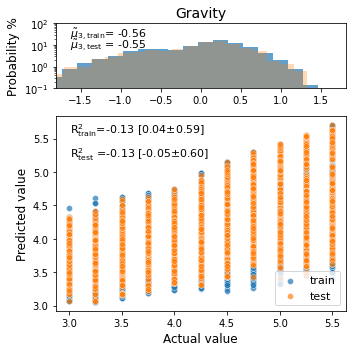

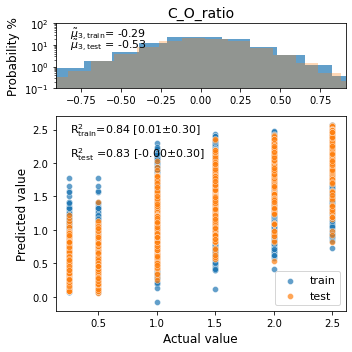

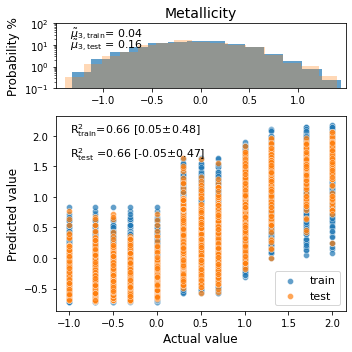

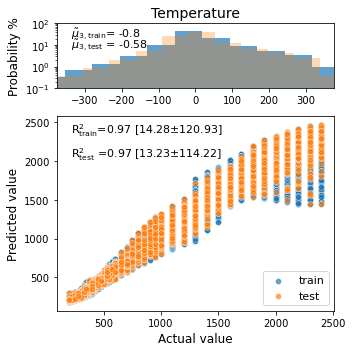

In [37]:
i = 1
regression_report(
        trained_model = train_cnn_model.trained_model,
        trained_data_processor = trained_Data_Processor,
        Xtrain = [trained_Data_Processor.X_train_standardized_rowwise[::i],
                  trained_Data_Processor.X_train_standardized_columnwise[::i]],
    
        Xtest  = [trained_Data_Processor.X_test_standardized_rowwise[::i], 
                  trained_Data_Processor.X_test_standardized_columnwise[::i]],
    
        ytrain = trained_Data_Processor.y_train_standardized_columnwise[::i],
    
        ytest  = trained_Data_Processor.y_test_standardized_columnwise[::i],
    
        target_i = 4,
        
        xy_top   = [0.05, 0.7],
        xy_bottom= [0.05, 0.85],
#         print_results = False,        
                 )